## PROJECT 1 MRI: diagnostic imaging SSY186
Start by importing data from given mat file. 

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.io as sio
import os

data = sio.loadmat('MRIdata.mat', struct_as_record=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


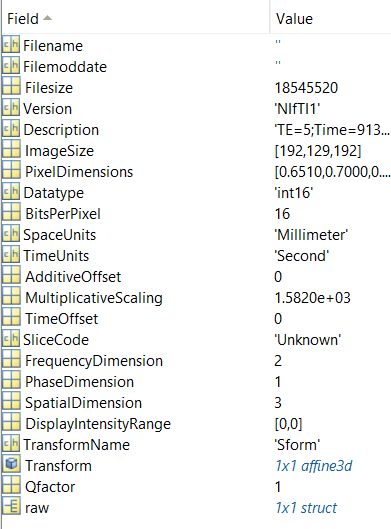

### Field of view
To calculate the FOV of the lens we will use the affine transform to transform the first pixel of the image and the last pixel, and then compare the distance between the two. 
As such the field of view is calculated as

FOV = pixels[end] * affine transform  -  pixels[0] * affine transform 

pixels[end] = [ImageSize * [pixel convertion to mili], 1]

pixels[0]   = [0, 0, 0, 1]

In [5]:
lens_data = (data['nifti_info'])[0,0]

affine = np.array([np.ndarray.flatten(lens_data.raw[0,0].srow_x),
                   np.ndarray.flatten(lens_data.raw[0,0].srow_y),
                   np.ndarray.flatten(lens_data.raw[0,0].srow_z),
                   [0,0,0,1]])

from nibabel.affines import apply_affine
FOV = apply_affine(affine, lens_data.ImageSize * lens_data.PixelDimensions) - apply_affine(affine, [0,0,0])
FOV

array([[58.78880799, 87.4996212 , 81.3802133 ]])

### Save image
Standardization for medical images is important. An algorithm or program should be able to correctly load and visualize the image otherwise correct treatment and/or diagnostic may be difficult or even impossible.  

In [19]:
from functions.filehandler import save_nifti_image

save_nifti_image(data['kspace_full'],"test.nii",lens_data)

File test.nii saved succesfully!
